# Section 10: Introduction to Time Series Data in Pandas

## Timeseries basics

In [1]:
import os
cwd = os.getcwd()
cwd

'/home/sidhlee/projects/learn-algo-trade/courses/algo-trade-a-z/part2_pandas-for-financial-data-analysis-and-intro-to-oop'

In [5]:
import pandas as pd
temp_path = "./Part2_Materials/Video_Lecture_NBs/temp.csv"
temp = pd.read_csv(temp_path)
print()

In [4]:
temp.info() 
# Dtype of object for datetime indicates that it's a string, not a datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   LA        35062 non-null  float64
 2   NY        35064 non-null  float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


In [8]:
# pass column name you need to parse as a datetime object
temp = pd.read_csv(temp_path, parse_dates=["datetime"])
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   LA        35062 non-null  float64       
 2   NY        35064 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 821.9 KB


In [9]:
temp.head()

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [10]:
temp.iloc[4, 0] # iloc[row, col]

Timestamp('2013-01-01 04:00:00')

In [11]:
# right now, we have the integer index
temp.index 

RangeIndex(start=0, stop=35064, step=1)

In [12]:
# set the timestamp as the index by setting index_col
temp = pd.read_csv(temp_path, parse_dates=['datetime'], index_col='datetime' )

In [13]:
temp.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [14]:
temp.tail()

,LA,NY
datetime,,
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8
2016-12-31 22:00:00,12.3,5.7
2016-12-31 23:00:00,11.9,5.5


In [15]:
# now, info() gives us a meaningful time range for the index, instead of the range of integers
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [16]:
# parse_dates parses datestring into a Timestamp object
temp.index[0]

Timestamp('2013-01-01 00:00:00')

In [17]:
temp = pd.read_csv(temp_path)
temp.datetime[0]

'2013-01-01 00:00:00'

In [19]:
# static method to convert a Series of date string into a Datetime object
pd.to_datetime(temp.datetime)

0       2013-01-01 00:00:00
1       2013-01-01 01:00:00
2       2013-01-01 02:00:00
3       2013-01-01 03:00:00
4       2013-01-01 04:00:00
                ...        
35059   2016-12-31 19:00:00
35060   2016-12-31 20:00:00
35061   2016-12-31 21:00:00
35062   2016-12-31 22:00:00
35063   2016-12-31 23:00:00
Name: datetime, Length: 35064, dtype: datetime64[ns]

In [23]:
# Instead of parse_dates, we can manually set the datetime index
datetime_series = pd.to_datetime(temp.datetime)
# set_index does not mutate df in place. it returns a new df.
temp = temp.set_index(datetime_series)
temp

,datetime,LA,NY
datetime,,,
2013-01-01 00:00:00,2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,2013-01-01 04:00:00,8.8,-2.3
...,...,...,...
2016-12-31 19:00:00,2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,2016-12-31 21:00:00,12.8,5.8


In [25]:
# axis=1 for dropping columns
temp = temp.drop("datetime", axis=1)

In [26]:
temp.index[0]

Timestamp('2013-01-01 00:00:00')

In [27]:
# Pandas is smart enough to accept various formats
pd.to_datetime('2022/06/11')

Timestamp('2022-06-11 00:00:00')

In [29]:
pd.to_datetime('20220611')

Timestamp('2022-06-11 00:00:00')

In [30]:
pd.to_datetime('June 11, 2022')

Timestamp('2022-06-11 00:00:00')

In [34]:
# to_datetime validates incorrect format
try:
    pd.to_datetime(['2022-06-01', '2022-06-02', 'WAT'])
except Exception as e:
    print(e)

Unknown string format: WAT


In [35]:
# you can coerce incorrect date string into a value instead of throwing
pd.to_datetime(['2022-12-25','boxing day'], errors='coerce')



DatetimeIndex(['2022-12-25', 'NaT'], dtype='datetime64[ns]', freq=None)

## Slicing time series

In [37]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [38]:
temp.loc['2013-01-01 02:00']

LA    9.9
NY   -2.0
Name: 2013-01-01 02:00:00, dtype: float64

In [39]:
# partial loc selects all sub values
temp.loc['2013-01-01']

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
2013-01-01 05:00:00,8.7,-2.5
2013-01-01 06:00:00,6.9,-3.2
2013-01-01 07:00:00,7.8,-3.4
2013-01-01 08:00:00,6.7,-3.0


In [42]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB


In [46]:
# has hourly data on LA and NY
temp.loc['2016-12-25'].shape

(24, 2)

In [47]:
# we can compare sliced df
temp.loc["2016-12-01": "2016-12-31"].equals(temp.loc['2016-12'])

True

In [52]:
# If you pass a list of datestring into to_datetime, it returns DatetimeIndex 
datetime_index = pd.to_datetime(['2016-12-25', '2016-12-31'])
datetime_index

DatetimeIndex(['2016-12-25', '2016-12-31'], dtype='datetime64[ns]', freq=None)

In [54]:
# To locate specific date, you have to pass a datetime index
temp.loc[datetime_index]

,LA,NY
2016-12-25,12.1,5.9
2016-12-31,15.7,0.8


## Downsampling time series
Often, you need to compress the higher frequency data into a lower frequency data.
(eg. tick value in every minute -> every 5 minute)

In [55]:
import pandas as pd

temp = pd.read_csv(temp_path, parse_dates=["datetime"], index_col='datetime')

In [57]:
temp.tail() # hourly

,LA,NY
datetime,,
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8
2016-12-31 22:00:00,12.3,5.7
2016-12-31 23:00:00,11.9,5.5


In [60]:
# resample returns DatetimeIndexResampler object which groups alls the rows within the given frequency
temp_datetime_index_resampler = temp.resample('D')
temp_datetime_index_resampler

In [63]:
# convert DatetimeIndexResampler into a list
list(temp_datetime_index_resampler)[0]
# the first item contains the first Timestamp of the group and the dataframe of all members of the group

(Timestamp('2013-01-01 00:00:00', freq='D'),
                        LA   NY
 datetime                      
 2013-01-01 00:00:00  11.7 -1.1
 2013-01-01 01:00:00  10.7 -1.7
 2013-01-01 02:00:00   9.9 -2.0
 2013-01-01 03:00:00   9.3 -2.1
 2013-01-01 04:00:00   8.8 -2.3
 2013-01-01 05:00:00   8.7 -2.5
 2013-01-01 06:00:00   6.9 -3.2
 2013-01-01 07:00:00   7.8 -3.4
 2013-01-01 08:00:00   6.7 -3.0
 2013-01-01 09:00:00   6.6 -1.8
 2013-01-01 10:00:00   6.1 -1.4
 2013-01-01 11:00:00   5.6 -1.8
 2013-01-01 12:00:00   5.1 -1.7
 2013-01-01 13:00:00   5.2 -1.5
 2013-01-01 14:00:00   4.6 -1.0
 2013-01-01 15:00:00   5.1 -0.0
 2013-01-01 16:00:00   6.2  1.2
 2013-01-01 17:00:00   9.3  2.2
 2013-01-01 18:00:00  11.4  3.3
 2013-01-01 19:00:00  12.0  3.5
 2013-01-01 20:00:00  12.9  3.1
 2013-01-01 21:00:00  13.9  2.4
 2013-01-01 22:00:00  14.1  2.4
 2013-01-01 23:00:00  14.0  2.7)

In [64]:
list(temp_datetime_index_resampler)[0][0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [65]:
list(temp_datetime_index_resampler)[0][1]

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
2013-01-01 05:00:00,8.7,-2.5
2013-01-01 06:00:00,6.9,-3.2
2013-01-01 07:00:00,7.8,-3.4
2013-01-01 08:00:00,6.7,-3.0


In [66]:
# DatetimeIndexResampler needs further process to get the resampled df.
temp.resample('D').first() # use the first row in each group 

,LA,NY
datetime,,
2013-01-01,11.7,-1.1
2013-01-02,13.2,2.6
2013-01-03,15.1,0.3
2013-01-04,16.3,-1.2
2013-01-05,18.1,-1.2
...,...,...
2016-12-27,15.1,4.1
2016-12-28,19.9,11.2
2016-12-29,23.3,2.1


In [67]:
# we can also downsample using mean value
temp.resample('D').mean()

,LA,NY
datetime,,
2013-01-01,8.858333,-0.404167
2013-01-02,9.283333,3.208333
2013-01-03,10.304167,-2.425000
2013-01-04,11.512500,-2.070833
2013-01-05,11.083333,0.816667
...,...,...
2016-12-27,12.154167,10.579167
2016-12-28,14.433333,4.016667
2016-12-29,16.045833,1.312500


In [71]:
# downsample using monthly mean
temp.resample('M').mean().head()

,LA,NY
datetime,,
2013-01-31,11.596237,1.129570
2013-02-28,12.587202,0.617857
2013-03-31,15.069946,3.719220
2013-04-30,16.487361,10.699306
2013-05-31,19.005780,15.824328


In [72]:
# use start of the month as the index -> this only changes index
temp.resample('MS').mean().head()

,LA,NY
datetime,,
2013-01-01,11.596237,1.129570
2013-02-01,12.587202,0.617857
2013-03-01,15.069946,3.719220
2013-04-01,16.487361,10.699306
2013-05-01,19.005780,15.824328


In [81]:
# resample by quarter and make March the first quarter
temp.resample('QS-Mar').mean().head()

,LA,NY
datetime,,
2012-12-01,12.066525,0.886723
2013-03-01,16.859973,10.074230
2013-06-01,21.184601,23.694384
2013-09-01,18.028755,13.258288
2013-12-01,14.675000,-0.301713


<AxesSubplot:xlabel='datetime'>

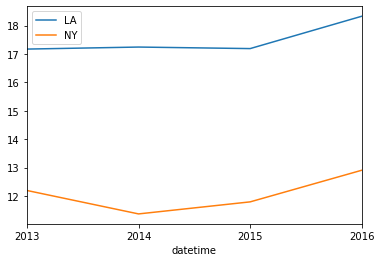

In [82]:
# LA is a lot warmer than NY and the average temperature is slowly rising starting 2014
temp.resample('YS').mean().plot()